**Transfer Learning on VGG19, ResNet50, and InceptionV3**

1. **Load CIFAR10 dataset**
     - Download from Library

2. **Import Image Classification Pre-trained Models**
   - Import Models and Set Device to CUDA
   - Helper Function
   - Define Train and Evaluation

3. **Training Models**
   - Train VGG19
   - Train ResNet50V2
   - Train InceptionV3

4. **Experiment with Fine-Tuned Pre-trained Models**
   - Prerequisite: Load CIFAR10 Dataset
   - Test Classification Performance
     - Report Accuracy

5. **Download Fine-Tuned Models**
   - Define Models to Load Saved Weights
   - Load Weight: Test Accuracy & F1 Score
     - VGG19
     - ResNet50V2
     - InceptionV3
     - Combined Test

6. **Layers and Parameters**



## Load CIFAR10 dataset.


Download from Library

In [ ]:
import torch
from torchvision import datasets, transforms

# Define transformations for the CIFAR10 images to match the pre-trained model input requirements
transform_vgg19_resnet50v2 = transforms.Compose([
    transforms.Resize(224),  # Resizing to 224x224 for VGG19 and ResNet50V2
    transforms.RandomHorizontalFlip(),  # Data augmentation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

transform_inceptionv3 = transforms.Compose([
    transforms.Resize(299),  # Resizing to 299x299 for inceptionv3
    transforms.RandomHorizontalFlip(),  # Data augmentation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load CIFAR10 training and test datasets using torchvision datasets module with appropriate transforms
trainset_vgg19_resnet50v2 = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_vgg19_resnet50v2)
trainset_inceptionv3 = datasets.CIFAR10(root='./data', train=True, download=False, transform=transform_inceptionv3)

testset_vgg19_resnet50v2 = datasets.CIFAR10(root='./data', train=False, download=False, transform=transform_vgg19_resnet50v2)
testset_inceptionv3 = datasets.CIFAR10(root='./data', train=False, download=False, transform=transform_inceptionv3)

# We will use a DataLoader to handle batching
trainloader_vgg19_resnet50v2 = torch.utils.data.DataLoader(trainset_vgg19_resnet50v2, batch_size=128, shuffle=True)
trainloader_inceptionv3 = torch.utils.data.DataLoader(trainset_inceptionv3, batch_size=128, shuffle=True)

testloader_vgg19_resnet50v2 = torch.utils.data.DataLoader(testset_vgg19_resnet50v2, batch_size=128, shuffle=False)
testloader_inceptionv3 = torch.utils.data.DataLoader(testset_inceptionv3, batch_size=128, shuffle=False)

# Check if the transformation was applied correctly by getting the shape of the first batch
first_batch_train_vgg19_resnet50v2 = next(iter(trainloader_vgg19_resnet50v2))[0].shape
first_batch_train_inceptionv3 = next(iter(trainloader_inceptionv3))[0].shape
first_batch_test_vgg19_resnet50v2 = next(iter(testloader_vgg19_resnet50v2))[0].shape
first_batch_test_inceptionv3 = next(iter(testloader_inceptionv3))[0].shape

print("Train batch shape VGG19/ResNet50V2:", first_batch_train_vgg19_resnet50v2)
print("Train batch shape inceptionv3:", first_batch_train_inceptionv3)
print("Test batch shape VGG19/ResNet50V2:", first_batch_test_vgg19_resnet50v2)
print("Test batch shape inceptionv3:", first_batch_test_inceptionv3)


Files already downloaded and verified
Train batch shape VGG19/ResNet50V2: torch.Size([128, 3, 224, 224])
Train batch shape inceptionv4: torch.Size([128, 3, 299, 299])
Test batch shape VGG19/ResNet50V2: torch.Size([128, 3, 224, 224])
Test batch shape inceptionv4: torch.Size([128, 3, 299, 299])


#Fine Tuning image classification models

**VGG-19**

**ResNet50V2**

**inceptionv3**


##Small and large version of existing image classification models, i.e.
pre-trained models, including VGG-19, ResNet50V2, and inceptionv3.
Then, run them on the CIFAR10.


###Import Models and Set device to CUDA

In [ ]:
from torchvision import models
import torch.nn as nn
import torch.optim as optim

#GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained models
vgg19 = models.vgg19(pretrained=True)
resnet50v2 = models.resnet50(pretrained=True)
inceptionv3 = models.inception_v3(pretrained=True)
inceptionv3.aux_logits = False  # Turn off the auxiliary output

# Modify the classifiers for CIFAR-10 (10 classes)
vgg19.classifier[6] = nn.Linear(vgg19.classifier[6].in_features, 10)
resnet50v2.fc = nn.Linear(resnet50v2.fc.in_features, 10)
inceptionv3.fc = nn.Linear(inceptionv3.fc.in_features, 10)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
 

###Helper Function

In [ ]:
def print_model_parameters(model):
    print("Model's named parameters:")
    for name, param in model.named_parameters():
        print(f"{name} - requires_grad: {param.requires_grad}, shape: {param.shape}")

def print_optimizer_parameters(optimizer):
    print("\nOptimizer's parameter groups:")
    for param_group in optimizer.param_groups:
        for param in param_group['params']:
            print(f"Parameter group has learning rate of {param_group['lr']}, weight decay of {param_group['weight_decay']}")
            if param.requires_grad:
                print(f"  - This parameter group includes trainable parameters.")
            else:
                print(f"  - This parameter group includes non-trainable parameters.")

def print_optimizer_parameters_names(model, optimizer):
    print("\nOptimizer's parameter names:")
    # Create a set of the id's of the parameters in the optimizer
    optim_params = {id(p) for pg in optimizer.param_groups for p in pg['params']}
    # Match the model parameters with the optimizer parameters
    for name, param in model.named_parameters():
        if id(param) in optim_params:
            print(f"Parameter in optimizer: {name}")


###Define Train and Evaluation

In [ ]:
def train_model(model, train_loader, test_loader, criterion, num_epochs, unfreeze_layers, device='cpu'):

    # Freeze all the layers first
    for param in model.parameters():
        param.requires_grad = False


    if(model == vgg19):
      # Only classifier parameters are optimized at first
      optimizer = optim.SGD(model.classifier.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)
      # Then, unfreeze the classifier layers
      for param in model.classifier.parameters():
          param.requires_grad = True

        # Define the layers to unfreeze
      unfreeze_layers = [model.features[i] for i in range(len(model.features)) if not isinstance(model.features[i], nn.MaxPool2d)]

    else:
      optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)
      # Then, unfreeze the fc layers
      for param in model.fc.parameters():
          param.requires_grad = True
      # Define the layers to unfreeze
      if model == resnet50v2:
        unfreeze_layers = [model.layer4, model.layer3, model.layer2, model.layer1, model.conv1, model.bn1][::-1]
      else:
        unfreeze_layers = [
        model.Mixed_7c, model.Mixed_7b, model.Mixed_7a,
        model.Mixed_6e, model.Mixed_6d, model.Mixed_6c,
        model.Mixed_6b, model.Mixed_6a, model.Mixed_5d,
        model.Mixed_5c, model.Mixed_5b, model.Conv2d_4a_3x3,
        model.Conv2d_3b_1x1, model.Conv2d_2b_3x3, model.Conv2d_2a_3x3, model.Conv2d_1a_3x3
        ][::-1]

    # print_model_parameters(model)



    # Scheduler to adjust the learning rate
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')



    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets)  # Compute the loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize the model


            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

        train_loss = running_loss / len(train_loader)
        train_accuracy = 100. * correct / total
        val_loss, val_accuracy = evaluate(model, test_loader, criterion, device)

        # Print training progress
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"Training loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")
        print(f"Validation loss: {val_loss:.4f}, Accuracy: {val_accuracy:.2f}%\n")

        # Adjust the learning rate based on the validation loss
        scheduler.step(val_loss)

        # Here's where you would print out the learning rates
        # for i, param_group in enumerate(optimizer.param_groups):
        #     print(f"Learning rate for parameter group {i}: {param_group['lr']}")

        # Gradual unfreezing: optionally unfreeze layers if we are at the right epoch

        if epoch == (num_epochs-5):
            # Unfreeze all the layers
            while(len(unfreeze_layers)):
              layer_to_unfreeze = unfreeze_layers.pop()
              for param in layer_to_unfreeze.parameters():
                  param.requires_grad = True
              # Update the optimizer for the newly unfrozen parameters
              for param_group in optimizer.param_groups:
                param_group['lr'] = 0.0001

            unfreeze_layers = []

        elif unfreeze_layers and epoch >= 4:
            if model == resnet50v2 and ((epoch+1) % int((num_epochs+1)/5))!=0 :
              continue
            else:
              c = 0
              layer_to_unfreeze = None
              while(c==0):
                layer_to_unfreeze = unfreeze_layers.pop()
                for param in layer_to_unfreeze.parameters():
                    param.requires_grad = True
                    c = 1

              # Update the optimizer for the newly unfrozen parameters
              optimizer.add_param_group({'params': layer_to_unfreeze.parameters(), 'lr': 0.0005})


        # print_model_parameters(model)


    return model


In [ ]:
def evaluate(model, data_loader, criterion, device):
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # Deactivate autograd to reduce memory usage
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    epoch_loss = running_loss / len(data_loader)
    epoch_accuracy = 100. * correct / total
    return epoch_loss, epoch_accuracy


### Train VGG19

In [ ]:
import time
start = time.time()  # Start the timer
print(f"Training started at {time.strftime('%X')}")
# Call the training function

# Initialize the model, criterion, optimizer, and data loaders
model = vgg19.to(device)
criterion = nn.CrossEntropyLoss()

# Define the number of epochs
num_epochs = 25

# Call the training function
trained_model = train_model(
    model=model,
    train_loader=trainloader_vgg19_resnet50v2,  # Replace with your actual train data loader
    test_loader=testloader_vgg19_resnet50v2,    # Replace with your actual test data loader
    criterion=criterion,
    num_epochs=num_epochs,
    unfreeze_layers=[],  # This should be a list of layers you wish to unfreeze
    device=device
)

print("Training complete.")

print(f"Training endted at {time.strftime('%X')}")
print(f"Training took {time.time() - start} seconds")

Training started at 20:53:43
Epoch 1/25
Training loss: 0.7130, Accuracy: 75.41%
Validation loss: 0.4872, Accuracy: 83.08%

Epoch 2/25
Training loss: 0.4997, Accuracy: 82.41%
Validation loss: 0.4352, Accuracy: 85.03%

Epoch 3/25
Training loss: 0.4460, Accuracy: 84.57%
Validation loss: 0.4081, Accuracy: 85.70%

Epoch 4/25
Training loss: 0.4096, Accuracy: 85.72%
Validation loss: 0.3918, Accuracy: 86.34%

Epoch 5/25
Training loss: 0.3842, Accuracy: 86.41%
Validation loss: 0.3795, Accuracy: 86.61%

Epoch 6/25
Training loss: 0.3579, Accuracy: 87.50%
Validation loss: 0.3633, Accuracy: 87.40%

Epoch 7/25
Training loss: 0.3316, Accuracy: 88.30%
Validation loss: 0.3395, Accuracy: 88.03%

Epoch 8/25
Training loss: 0.2952, Accuracy: 89.75%
Validation loss: 0.3123, Accuracy: 89.31%

Epoch 9/25
Training loss: 0.2620, Accuracy: 90.77%
Validation loss: 0.2945, Accuracy: 89.62%

Epoch 10/25
Training loss: 0.2273, Accuracy: 92.02%
Validation loss: 0.2746, Accuracy: 90.44%

Epoch 11/25
Training loss: 0.1

In [ ]:
# Save the trained model
import time
torch.save(trained_model.state_dict(), 'vgg19_trained_2.pth')

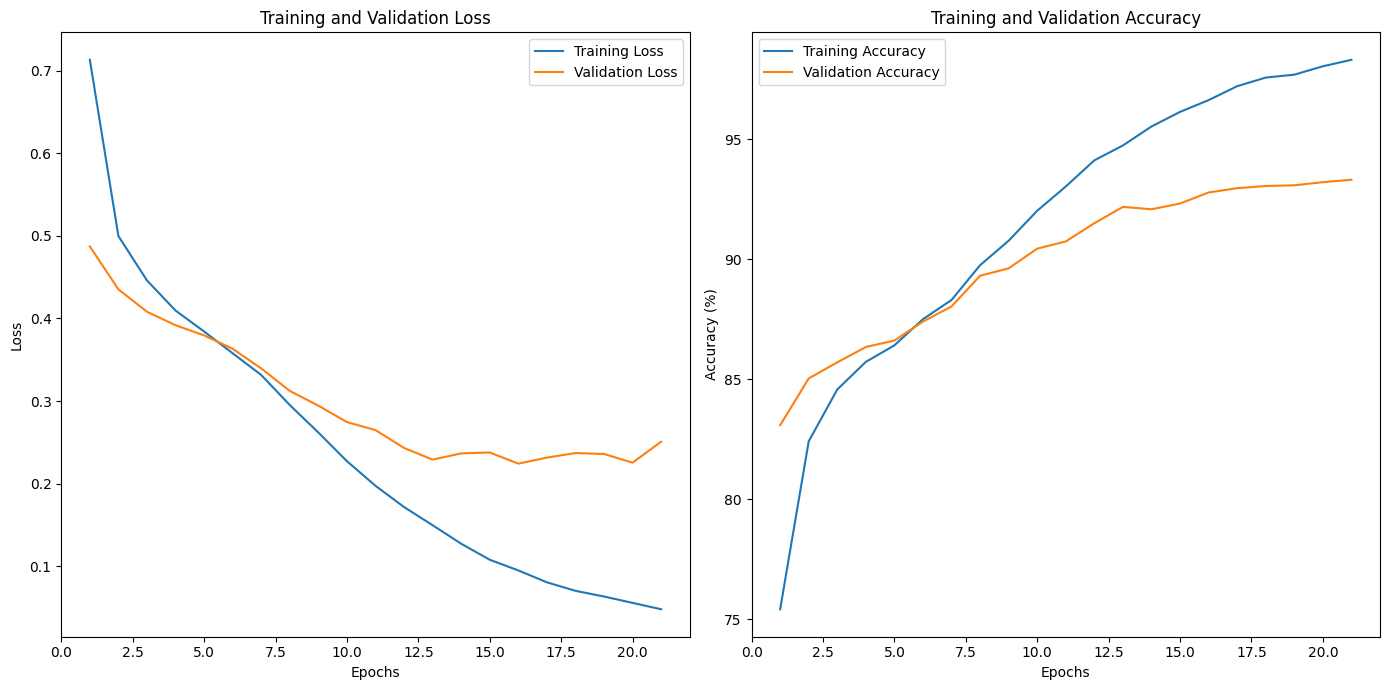

In [ ]:
import matplotlib.pyplot as plt

# Training and validation losses and accuracies provided by the user
epochs = list(range(1, 22))
training_loss = [
    0.7130, 0.4997, 0.4460, 0.4096, 0.3842, 0.3579, 0.3316, 0.2952, 0.2620,
    0.2273, 0.1975, 0.1718, 0.1498, 0.1274, 0.1080, 0.0951, 0.0807, 0.0704,
    0.0635, 0.0558, 0.0481
]
validation_loss= [
    0.4872, 0.4352, 0.4081, 0.3918, 0.3795, 0.3633, 0.3395, 0.3123, 0.2945,
    0.2746, 0.2649, 0.2433, 0.2292, 0.2367, 0.2378, 0.2243, 0.2316, 0.2371,
    0.2360, 0.2255, 0.2508
]
training_accuracy = [
    75.41, 82.41, 84.57, 85.72, 86.41, 87.50, 88.30, 89.75, 90.77,
    92.02, 93.03, 94.12, 94.74, 95.53, 96.14, 96.63, 97.21, 97.57,
    97.69, 98.04, 98.31
]
validation_accuracy= [
    83.08, 85.03, 85.70, 86.34, 86.61, 87.40, 88.03, 89.31, 89.62,
    90.44, 90.74, 91.50, 92.18, 92.08, 92.32, 92.78, 92.96, 93.05,
    93.08, 93.21, 93.31
]

# Plot training and validation loss
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

###Train Resnet50V2

In [ ]:
import time
start = time.time()  # Start the timer
print(f"Training started at {time.strftime('%X')}")
# Call the training function

# Initialize the model, criterion, optimizer, and data loaders
model = resnet50v2.to(device)
criterion = nn.CrossEntropyLoss()

# Define the number of epochs
num_epochs = 25

# Call the training function
trained_model = train_model(
    model=model,
    train_loader=trainloader_vgg19_resnet50v2,  # Replace with your actual train data loader
    test_loader=testloader_vgg19_resnet50v2,    # Replace with your actual test data loader
    criterion=criterion,
    num_epochs=num_epochs,
    unfreeze_layers=[],  # This should be a list of layers you wish to unfreeze
    device=device
)

print("Training complete.")

print(f"Training endted at {time.strftime('%X')}")
print(f"Training took {time.time() - start} seconds")

Training started at 22:11:50
Epoch 1/25
Training loss: 1.1711, Accuracy: 68.18%
Validation loss: 0.8154, Accuracy: 76.30%

Epoch 2/25
Training loss: 0.7505, Accuracy: 76.99%
Validation loss: 0.7044, Accuracy: 77.49%

Epoch 3/25
Training loss: 0.6744, Accuracy: 78.35%
Validation loss: 0.6493, Accuracy: 78.49%

Epoch 4/25
Training loss: 0.6387, Accuracy: 79.20%
Validation loss: 0.6229, Accuracy: 79.38%

Epoch 5/25
Training loss: 0.6121, Accuracy: 79.72%
Validation loss: 0.6053, Accuracy: 79.48%

Epoch 6/25
Training loss: 0.4721, Accuracy: 83.81%
Validation loss: 0.4056, Accuracy: 85.96%

Epoch 7/25
Training loss: 0.3383, Accuracy: 88.40%
Validation loss: 0.3481, Accuracy: 88.03%

Epoch 8/25
Training loss: 0.2814, Accuracy: 90.27%
Validation loss: 0.3274, Accuracy: 88.46%

Epoch 9/25
Training loss: 0.2380, Accuracy: 91.87%
Validation loss: 0.3089, Accuracy: 89.12%

Epoch 10/25
Training loss: 0.2069, Accuracy: 93.06%
Validation loss: 0.2987, Accuracy: 89.64%

Epoch 11/25
Training loss: 0.1

In [ ]:
# Save the trained model
torch.save(trained_model.state_dict(), '/content/drive/MyDrive/Colab Notebooks/resnet50v2.pth')

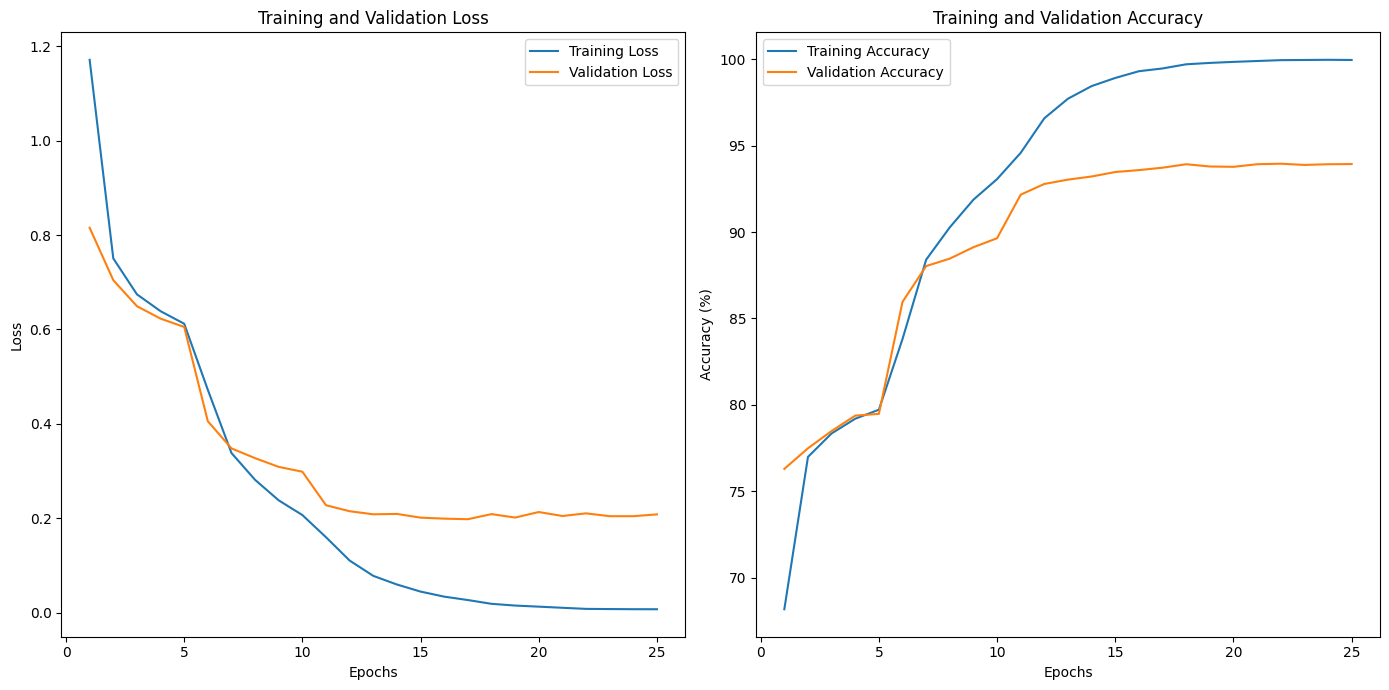

In [ ]:
import matplotlib.pyplot as plt

# Given data for plotting
training_loss = [1.1711, 0.7505, 0.6744, 0.6387, 0.6121, 0.4721, 0.3383, 0.2814, 0.2380,
                0.2069, 0.1599, 0.1105, 0.0781, 0.0598, 0.0448, 0.0341, 0.0269, 0.0189,
                0.0152, 0.0129, 0.0105, 0.0082, 0.0078, 0.0075, 0.0074]
validation_loss = [0.8154, 0.7044, 0.6493, 0.6229, 0.6053, 0.4056, 0.3481, 0.3274, 0.3089,
              0.2987, 0.2277, 0.2150, 0.2085, 0.2093, 0.2014, 0.1993, 0.1981, 0.2089,
              0.2016, 0.2133, 0.2049, 0.2105, 0.2045, 0.2045, 0.2083]
training_accuracy = [68.18, 76.99, 78.35, 79.20, 79.72, 83.81, 88.40, 90.27, 91.87,
                    93.06, 94.58, 96.58, 97.71, 98.44, 98.91, 99.30, 99.46, 99.70,
                    99.78, 99.84, 99.89, 99.94, 99.95, 99.96, 99.95]
validation_accuracy = [76.30, 77.49, 78.49, 79.38, 79.48, 85.96, 88.03, 88.46, 89.12,
                  89.64, 92.16, 92.78, 93.03, 93.21, 93.47, 93.58, 93.72, 93.92,
                  93.79, 93.77, 93.92, 93.95, 93.88, 93.92, 93.93]
epochs = list(range(1, 26))

# Plot training and validation loss
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()



### Train inceptionv3

In [ ]:
import time
start = time.time()  # Start the timer
print(f"Training started at {time.strftime('%X')}")
# Call the training function

# Initialize the model, criterion, optimizer, and data loaders
model = inceptionv3.to(device)
criterion = nn.CrossEntropyLoss()

# Define the number of epochs
num_epochs = 25

# Call the training function
trained_model = train_model(
    model=model,
    train_loader=trainloader_inceptionv3,  # Replace with your actual train data loader
    test_loader=testloader_inceptionv3,    # Replace with your actual test data loader
    criterion=criterion,
    num_epochs=num_epochs,
    unfreeze_layers=[],  # This should be a list of layers you wish to unfreeze
    device=device
)

print("Training complete.")

print(f"Training endted at {time.strftime('%X')}")
print(f"Training took {time.time() - start} seconds")

Training started at 22:04:28
Epoch 1/25
Training loss: 1.6068, Accuracy: 54.47%
Validation loss: 1.1738, Accuracy: 69.62%

Epoch 2/25
Training loss: 1.1158, Accuracy: 67.05%
Validation loss: 0.9815, Accuracy: 71.55%

Epoch 3/25
Training loss: 0.9963, Accuracy: 68.69%
Validation loss: 0.8996, Accuracy: 72.26%

Epoch 4/25
Training loss: 0.9404, Accuracy: 69.85%
Validation loss: 0.8507, Accuracy: 73.44%

Epoch 5/25
Training loss: 0.9066, Accuracy: 70.37%
Validation loss: 0.8222, Accuracy: 73.46%

Epoch 6/25
Training loss: 0.7952, Accuracy: 73.11%
Validation loss: 0.6725, Accuracy: 77.22%

Epoch 7/25
Training loss: 0.6465, Accuracy: 77.80%
Validation loss: 0.5509, Accuracy: 80.81%

Epoch 8/25
Training loss: 0.5256, Accuracy: 81.99%
Validation loss: 0.4607, Accuracy: 83.64%

Epoch 9/25
Training loss: 0.4280, Accuracy: 85.35%
Validation loss: 0.3876, Accuracy: 86.12%

Epoch 10/25
Training loss: 0.3338, Accuracy: 88.43%
Validation loss: 0.3168, Accuracy: 88.89%

Epoch 11/25
Training loss: 0.2

In [ ]:
# Save the trained model
torch.save(trained_model.state_dict(), '/content/drive/MyDrive/results/inceptionv3.pth')

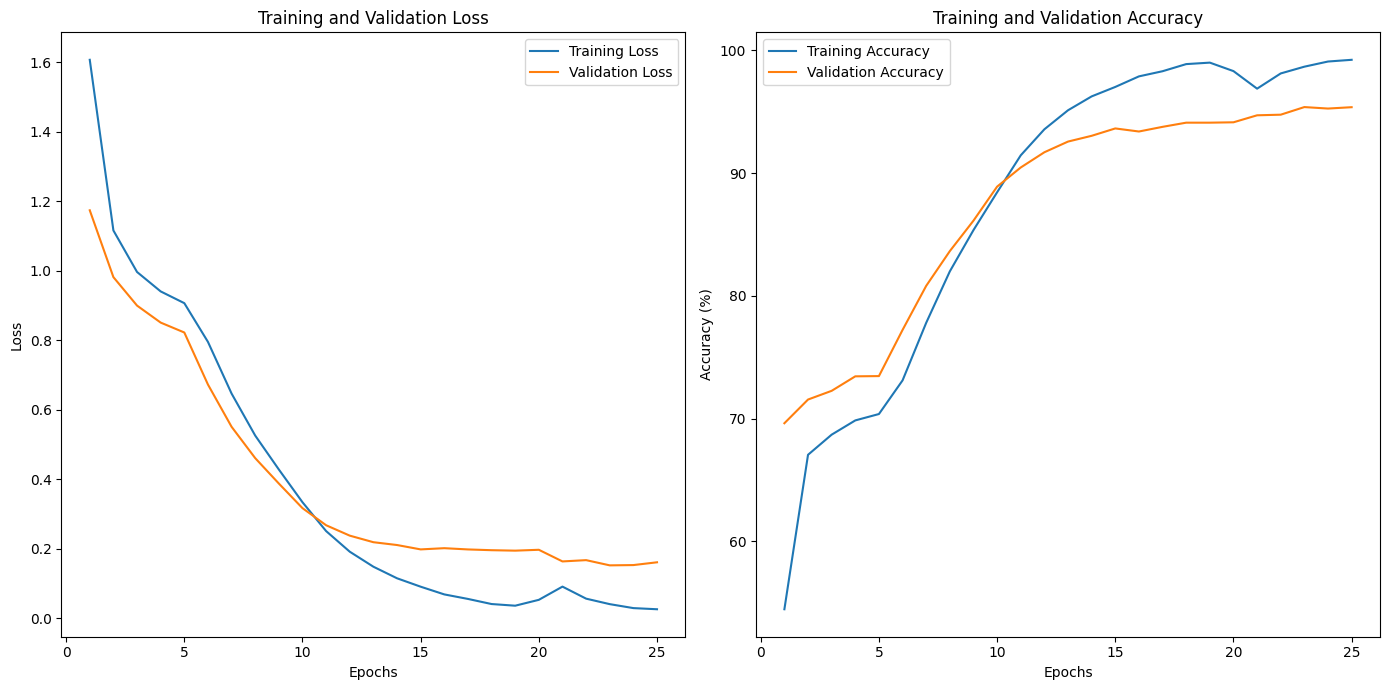

In [ ]:
import matplotlib.pyplot as plt

# Training and validation loss and accuracy data
training_loss = [
    1.6068, 1.1158, 0.9963, 0.9404, 0.9066, 0.7952, 0.6465, 0.5256, 0.4280,
    0.3338, 0.2508, 0.1915, 0.1483, 0.1150, 0.0908, 0.0686, 0.0556, 0.0409,
    0.0361, 0.0530, 0.0910, 0.0564, 0.0406, 0.0292, 0.0259
]

validation_loss = [
    1.1738, 0.9815, 0.8996, 0.8507, 0.8222, 0.6725, 0.5509, 0.4607, 0.3876,
    0.3168, 0.2676, 0.2377, 0.2188, 0.2107, 0.1981, 0.2016, 0.1980, 0.1958,
    0.1945, 0.1970, 0.1635, 0.1672, 0.1522, 0.1530, 0.1610
]

training_accuracy = [
    54.47, 67.05, 68.69, 69.85, 70.37, 73.11, 77.80, 81.99, 85.35,
    88.43, 91.44, 93.56, 95.11, 96.24, 97.01, 97.87, 98.29, 98.87,
    98.99, 98.30, 96.87, 98.11, 98.66, 99.08, 99.22
]

validation_accuracy = [
    69.62, 71.55, 72.26, 73.44, 73.46, 77.22, 80.81, 83.64, 86.12,
    88.89, 90.45, 91.69, 92.56, 93.03, 93.63, 93.38, 93.76, 94.10,
    94.10, 94.13, 94.70, 94.75, 95.37, 95.25, 95.36
]

epochs = range(1, 26)  # 25 epochs

# Plot training and validation loss
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


#Experiment with fine tuned pre-trained models
## **pre requisite:** Load CIFAR10 dataset first


test classification performance with all these pre-trained models on the
CIFAR10 dataset and report their accuracy.

##Download my Fine Tuned Models

In [ ]:
# Convert the shareable link to a direct download link
vgg_link = "https://drive.google.com/file/d/1K2hMEiIS2XLXUt0nS62G-tryLgOSvXGz/view?usp=sharing" # Replace with your actual link
resnet_link = "https://drive.google.com/file/d/1KGthciEXc3HUC3bNRjd78dC_P6tVnyhk/view?usp=sharing"
inception_link = "https://drive.google.com/file/d/1-74fZEF0KdnniXAcMc3mXxsUsKgPMyvd/view?usp=sharing"

In [ ]:
# Function to convert shareable link to direct download link
def convert_to_direct_download(gdrive_link):
    file_id = gdrive_link.split('/')[5]
    direct_link = f"https://drive.google.com/uc?export=download&id={file_id}"
    return direct_link

In [ ]:
# Convert and download VGG
direct_download_link_vgg = convert_to_direct_download(vgg_link)
!gdown --id {direct_download_link_vgg.split('=')[-1]} -O 'vgg19.pth'

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1K2hMEiIS2XLXUt0nS62G-tryLgOSvXGz
To: /content/vgg19.pth
100% 558M/558M [00:02<00:00, 252MB/s]


In [ ]:
# Convert and download ResNet
direct_download_link_resnet = convert_to_direct_download(resnet_link)
!gdown --id {direct_download_link_resnet.split('=')[-1]} -O 'resnet50v2.pth'

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KGthciEXc3HUC3bNRjd78dC_P6tVnyhk
To: /content/resnet50v2.pth
100% 94.4M/94.4M [00:00<00:00, 293MB/s]


In [ ]:
# Convert and download Inception
direct_download_link = convert_to_direct_download(inception_link)
!gdown --id {direct_download_link.split('=')[-1]} -O 'inceptionv3.pth'

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-74fZEF0KdnniXAcMc3mXxsUsKgPMyvd
To: /content/inceptionv4.pth
100% 101M/101M [00:00<00:00, 180MB/s]


## Define Models to Load saved weights

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torch.nn as nn

In [ ]:
from sklearn.metrics import f1_score

def evaluate_with_f1(model, data_loader, criterion, device):
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    total_preds = []
    total_targets = []

    with torch.no_grad():  # Deactivate autograd to reduce memory usage
        for inputs, targets in data_loader:
            # Transfer inputs and targets to the correct device
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            running_loss += loss.item()
            _, predicted = outputs.max(1)

            # Append current predictions and current targets to list
            total_preds.extend(predicted.view(-1).cpu().numpy())
            total_targets.extend(targets.cpu().numpy())

    # Calculate F1 score using true labels and predicted labels
    f1 = f1_score(total_targets, total_preds, average='weighted')

    epoch_loss = running_loss / len(data_loader)
    epoch_accuracy = 100. * sum(p == t for p, t in zip(total_preds, total_targets)) / len(total_preds)

    return epoch_loss, epoch_accuracy, f1

In [ ]:
# Initialize models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

vgg19 = models.vgg19(pretrained=True).to(device)
resnet50v2 = models.resnet50(pretrained=True).to(device)
inceptionv3 = models.inception_v3(pretrained=True).to(device)

# Modify the classifiers for CIFAR-10 (10 classes)
vgg19.classifier[6] = nn.Linear(vgg19.classifier[6].in_features, 10).to(device)
resnet50v2.fc = nn.Linear(resnet50v2.fc.in_features, 10).to(device)
inceptionv3.fc = nn.Linear(inceptionv3.fc.in_features, 10).to(device)

# Make sure to call model.eval() when evaluating
vgg19.eval()
resnet50v2.eval()
inceptionv3.eval()

criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
 

## Load Weight: Test accuracy & F1 Score

vgg19

In [ ]:
# state paths to your saved models
vgg19_path = 'vgg19.pth'

# Load saved weights with map_location to ensure weights are on the correct device
vgg19.load_state_dict(torch.load(vgg19_path, map_location=device))

start = time.time()
# Evaluate fine-tuned VGG19
vgg19_loss, vgg19_accuracy, f1 = evaluate_with_f1(vgg19, testloader_vgg19_resnet50v2 , criterion, device)
time_elapsed = time.time() - start  # calculate the time elapsed

print(f'Time taken to Test Accuracy: {time_elapsed:.2f}sec')
print(f'VGG19 Test Accuracy: {vgg19_accuracy:.2f}%')
print(f'F1 Score: {f1:.4f}')

Time taken to Test Accuracy: 29.89sec
VGG19 Test Accuracy: 92.35%
VGG19 F1 Score: 0.9234


resnet50v2

In [ ]:
# state paths to your saved models
resnet50v2_path = 'resnet50v2.pth'

# Load saved weights with map_location to ensure weights are on the correct device
resnet50v2.load_state_dict(torch.load(resnet50v2_path, map_location=device))

start = time.time()

# Evaluate ResNet50V2
resnet50v2_loss, resnet50v2_accuracy, f1 = evaluate_with_f1(resnet50v2, testloader_vgg19_resnet50v2, criterion, device)
time_elapsed = time.time() - start  # calculate the time elapsed

print(f'Time taken to Test Accuracy: {time_elapsed:.2f}sec')
print(f'ResNet50V2 Test Accuracy: {resnet50v2_accuracy:.2f}%')
print(f'F1 Score: {f1:.4f}')

Time taken to Test Accuracy: 23.06sec
ResNet50V2 Test Accuracy: 94.16%
VGG19 F1 Score: 0.9415


inceptionv3

In [ ]:
# state paths to your saved models
inceptionv3_path = 'inceptionv3.pth'

# Load saved weights with map_location to ensure weights are on the correct device
inceptionv3.load_state_dict(torch.load(inceptionv3_path, map_location=device))

# Evaluate inceptionv3
start = time.time()
inceptionv3_loss, inceptionv3_accuracy, f1 = evaluate_with_f1(inceptionv3, testloader_inceptionv3, criterion, device)
time_elapsed = time.time() - start  # calculate the time elapsed

print(f'Time taken to Test Accuracy: {time_elapsed:.2f}sec')
print(f'inceptionv3 Test Accuracy: {inceptionv3_accuracy:.2f}%')
print(f'F1 Score: {f1:.4f}')

Time taken to Test Accuracy: 33.82sec
InceptionV4 Test Accuracy: 95.34%
VGG19 F1 Score: 0.9534


Combined test

In [ ]:
# state paths to your saved models
vgg19_path = 'vgg19.pth'
resnet50v2_path = 'resnet50v2.pth'
inceptionv3_path = 'inceptionv3.pth'

# Load saved weights with map_location to ensure weights are on the correct device
vgg19.load_state_dict(torch.load(vgg19_path, map_location=device))
resnet50v2.load_state_dict(torch.load(resnet50v2_path, map_location=device))
inceptionv3.load_state_dict(torch.load(inceptionv3_path, map_location=device))

# Evaluate VGG19
vgg19_loss, vgg19_accuracy = evaluate_with_f1(vgg19, testloader_vgg19_resnet50v2 , criterion, device)
print(f'VGG19 Test Accuracy: {vgg19_accuracy:.2f}%')

# Evaluate ResNet50V2
resnet50v2_loss, resnet50v2_accuracy = evaluate(resnet50v2, testloader_vgg19_resnet50v2, criterion, device)
print(f'ResNet50V2 Test Accuracy: {resnet50v2_accuracy:.2f}%')

# Evaluate inceptionv3
inceptionv3_loss, inceptionv3_accuracy = evaluate(inceptionv3, testloader_inceptionv3, criterion, device)
print(f'inceptionv3 Test Accuracy: {inceptionv3_accuracy:.2f}%')


##Layers and Parameters

In [ ]:
total_params = 0
trainable_params = 0
non_trainable_params = 0
model = vgg19
for param in model.parameters():
    total_params += param.numel()
    if param.requires_grad:
        trainable_params += param.numel()
    else:
        non_trainable_params += param.numel()
print("Vgg19 layers and parameters :------------------  ")
print(f"Total Parameters: {total_params}")
print(f"Trainable Parameters: {trainable_params}")
print(f"Non-trainable Parameters: {non_trainable_params}")
def count_layers(model, count_nested=True):
    layer_count = 0
    for child in model.children():
        if count_nested and list(child.children()):  # If the child has children of its own
            layer_count += count_layers(child)
        else:
            layer_count += 1
    return layer_count

number_of_layers = count_layers(model)
print(f"Number of layers: {number_of_layers}")



Vgg19 layers and parameters :------------------  
Total Parameters: 139611210
Trainable Parameters: 139611210
Non-trainable Parameters: 0
Number of layers: 45


In [ ]:
total_params = 0
trainable_params = 0
non_trainable_params = 0
model = resnet50v2
for param in model.parameters():
    total_params += param.numel()
    if param.requires_grad:
        trainable_params += param.numel()
    else:
        non_trainable_params += param.numel()
print("Resnet50v2 layers and parameters :------------------  ")
print(f"Total Parameters: {total_params}")
print(f"Trainable Parameters: {trainable_params}")
print(f"Non-trainable Parameters: {non_trainable_params}")
def count_layers(model, count_nested=True):
    layer_count = 0
    for child in model.children():
        if count_nested and list(child.children()):  # If the child has children of its own
            layer_count += count_layers(child)
        else:
            layer_count += 1
    return layer_count

number_of_layers = count_layers(model)
print(f"Number of layers: {number_of_layers}")



Resnet50v2 layers and parameters :------------------  
Total Parameters: 23528522
Trainable Parameters: 23528522
Non-trainable Parameters: 0
Number of layers: 126


In [ ]:
total_params = 0
trainable_params = 0
non_trainable_params = 0
model = inceptionv3
for param in model.parameters():
    total_params += param.numel()
    if param.requires_grad:
        trainable_params += param.numel()
    else:
        non_trainable_params += param.numel()
print("inceptionv3 layers and parameters :------------------  ")
print(f"Total Parameters: {total_params}")
print(f"Trainable Parameters: {trainable_params}")
print(f"Non-trainable Parameters: {non_trainable_params}")
def count_layers(model, count_nested=True):
    layer_count = 0
    for child in model.children():
        if count_nested and list(child.children()):  # If the child has children of its own
            layer_count += count_layers(child)
        else:
            layer_count += 1
    return layer_count

number_of_layers = count_layers(model)
print(f"Number of layers: {number_of_layers}")

Inceptionv4 layers and parameters :------------------  
Total Parameters: 25132754
Trainable Parameters: 25132754
Non-trainable Parameters: 0
Number of layers: 198
